# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Assignment 1 - Regression
## Question 5 - Polynomial Regression

#### Original author: Tony Vu Nguyen (301286979) - tvn4@sfu.ca
#### Created: Feb 10, 2022
#### Modified: Feb 14, 2022

In [1]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python

In [2]:
# load data from Q1
%store -r df F T F_train F_test T_train T_test

### 1 - Polynomial Regression

In [15]:
#%% Polynomial Regression with 1 Feature for visualization
import random
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Four features from Q4 and one target (TEY) due to memory issues
x_train = F_train[['TIT', 'CDP', 'GTEP', 'AFDP']]
y_train = T_train['TEY']

x_test = F_test[['TIT', 'CDP', 'GTEP', 'AFDP']]
y_test = T_test['TEY']

# Standardizing features by removing the mean and scaling to unit variance
scaler = preprocessing.StandardScaler()
degree = [2, 4, 5, 7, 9, 11] #degree of polynomial

## Model Creation
model_poly = []

for n in range(len(degree)):
    #model_poly.append(make_pipeline(PolynomialFeatures(degree[n]),scaler,LinearRegression())) #scaler causes errors?
    model_poly.append(make_pipeline(PolynomialFeatures(degree[n]),LinearRegression()))
    model_poly[n].fit(x_train, y_train)

In [23]:
# Model evalution
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error as MSE
yp, r2, RMSE = [], [], []
 
for n in range(len(degree)):
    yp.append(model_poly[n].predict(x_test))
    r2.append(r2_score(y_test, yp[n]))
    RMSE.append([('%i' %degree[n]), sqrt(MSE(y_test, yp[n]))])
    
    
    print('\nPolynomial Regression Model -Test (Degree = %i): r-squared = %f, RMSE = %f' %(degree[n], r2[n], RMSE[n][1]))


Polynomial Regression Model -Test (Degree = 2): r-squared = 0.985812, RMSE = 1.880682

Polynomial Regression Model -Test (Degree = 4): r-squared = 0.988587, RMSE = 1.686757

Polynomial Regression Model -Test (Degree = 5): r-squared = 0.978223, RMSE = 2.329957

Polynomial Regression Model -Test (Degree = 7): r-squared = 0.988146, RMSE = 1.719048

Polynomial Regression Model -Test (Degree = 9): r-squared = 0.987941, RMSE = 1.733824

Polynomial Regression Model -Test (Degree = 11): r-squared = 0.986756, RMSE = 1.817045

Polynomial Regression Model -Test (Degree = 15): r-squared = 0.988808, RMSE = 1.670359


In [24]:
yp_train, r2_train, RMSE_train = [], [], []
 
for n in range(len(degree)):
    yp_train.append(model_poly[n].predict(x_train))
    r2_train.append(r2_score(y_train, yp_train[n]))
    RMSE_train.append([('%i' %degree[n]), sqrt(MSE(y_train, yp_train[n]))])
    print('\nPolynomial Regression Model - Train (Degree = %i): r-squared = %f, RMSE = %f' %(degree[n], r2_train[n], RMSE_train[n][1]))
    


Polynomial Regression Model - Train (Degree = 2): r-squared = 0.985152, RMSE = 1.897880

Polynomial Regression Model - Train (Degree = 4): r-squared = 0.987946, RMSE = 1.709996

Polynomial Regression Model - Train (Degree = 5): r-squared = 0.987849, RMSE = 1.716893

Polynomial Regression Model - Train (Degree = 7): r-squared = 0.987798, RMSE = 1.720482

Polynomial Regression Model - Train (Degree = 9): r-squared = 0.987703, RMSE = 1.727138

Polynomial Regression Model - Train (Degree = 11): r-squared = 0.986574, RMSE = 1.804714

Polynomial Regression Model - Train (Degree = 15): r-squared = 0.988586, RMSE = 1.663971


Text(0, 0.5, 'RMSE')

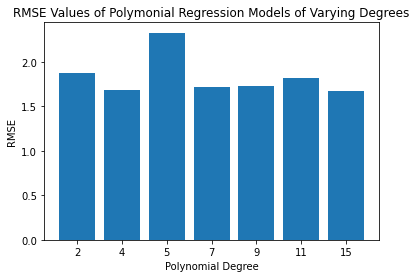

In [18]:
## Barchart of RMSE Values
RMSE_df = pd.DataFrame (RMSE, columns = ['Degree', 'RMSE'])    
plt.bar(RMSE_df['Degree'],RMSE_df['RMSE'])
plt.title('RMSE Values of Polymonial Regression Models of Varying Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')